#### 1) Importing libraries and data

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path creating to import data base
path=r"C:\Users\galia\Instacart Basket Analysis\02 Data\Prepared Data"

In [3]:
#Import data base
df_insta=pd.read_pickle(os.path.join(path,"ords_prods_def.pkl"))

In [4]:
# Df_inst shape checks
df_insta.shape

(32404859, 39)

In [5]:
# Df_inst Columns checks
df_insta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 39 columns):
 #   Column                   Dtype   
---  ------                   -----   
 0   order_id                 int64   
 1   user_id                  object  
 2   order_number             int64   
 3   orders_days_of_the_week  int64   
 4   time_of_day              int64   
 5   days_since_prior_order   float64 
 6   product_id               int64   
 7   add_to_cart_order        int64   
 8   reordered                int64   
 9   Unnamed: 0_y             int64   
 10  product_name             object  
 11  aisle_id                 int64   
 12  department_id            int64   
 13  prices                   float64 
 14  price_range_loc          object  
 15  busiest_days             object  
 16  busiest_period_of_day    object  
 17  max_order                int64   
 18  loyalty_flag             object  
 19  avg_price                float64 
 20  spending_flag         

In [6]:
# Df_inst header checks
df_insta.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,fam_status,income,True,department,Region,Active_cust,Age_range,Income_lvl,dependants,diet_profile
0,2539329,1,1,2,8,NaN,196,1,0,195,...,married,40423,both,beverages,South,High activity customerst,35-65,Low income,Have dependants,Vegetarian
1,2398795,1,2,3,7,15.0,196,1,1,195,...,married,40423,both,beverages,South,High activity customerst,35-65,Low income,Have dependants,Vegetarian
2,473747,1,3,3,12,21.0,196,1,1,195,...,married,40423,both,beverages,South,High activity customerst,35-65,Low income,Have dependants,Vegetarian
3,2254736,1,4,4,7,29.0,196,1,1,195,...,married,40423,both,beverages,South,High activity customerst,35-65,Low income,Have dependants,Vegetarian
4,431534,1,5,4,15,28.0,196,1,1,195,...,married,40423,both,beverages,South,High activity customerst,35-65,Low income,Have dependants,Vegetarian


### 2)Security check

##### Data concerned to customer was removed in previous step, names and surnames

### 3) creating region segmentation

In [7]:
Region=[]
for value in df_insta["STATE"]:
  if (value=="Maine")or (value=="New Hampshire")or(value=="Vermont")or(value=="Massachusetts")or(value=="Rhode Island")or(value=="Connecticut")or(value=="New York")or(value=="Pennsylvania")or(value=="New Jersey"):
    Region.append("Northeast")
  elif (value=="Wisconsin")or(value=="Michigan")or(value=="Illinois")or(value=="Indiana")or(value=="Ohio")or(value=="North Dakota")or(value=="South Dakota")or(value=="Nebraska")or(value=="Kansas")or(value=="Minnesota")or(value=="Iowa")or(value=="Missouri"):
    Region.append("Midwest")
  elif (value=="Delaware")or(value=="Maryland")or(value=="District of Columbia")or(value=="Virginia")or(value=="West Virginia")or(value=="North Carolina")or(value=="South Carolina")or(value=="Georgia")or(value=="Florida")or(value=="Kentucky")or(value=="Tennessee")or(value=="Mississippi")or(value=="Alabama")or(value=="Oklahoma")or(value=="Texas")or(value=="Arkansas")or(value=="Louisiana"):
    Region.append("South")
  else:
    Region.append("West")

In [8]:
#Adding Region column
df_insta["Region"]=Region

In [9]:
#Checking region
df_insta["Region"].value_counts(dropna=False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

#### Crossing data region and spending flag

In [10]:
#cross tab Region/spending flag
region_spend = pd.crosstab(df_insta["Region"], df_insta["spending_flag"], dropna = False)

In [11]:
##Checking region
region_spend

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [12]:
#Coping to clipboard
region_spend.to_clipboard()

### 4) Create an exclusion flag for low-activity customers

In [13]:
#Locating low activity customer
df_insta.loc[df_insta['max_order'] < 5, 'Active_cust'] = 'Low activity customerst'

In [14]:
#Locating high activity customer
df_insta.loc[df_insta['max_order'] >= 5, 'Active_cust'] = 'High activity customerst'

In [15]:
#Checking counts of active customers
df_insta["Active_cust"].value_counts(dropna=False)

High activity customerst    30964564
Low activity customerst      1440295
Name: Active_cust, dtype: int64

In [16]:
# Subset of high activity customer
high_act_cust=df_insta[df_insta['Active_cust'] == 'High activity customerst']


KeyboardInterrupt



In [ ]:
high_act_cust.to_pickle(r"C:\Users\galia\Instacart Basket Analysis\02 Data\Prepared Data\high_act_cts.pkl")

### 5) Customer profiling

#### Age profiling

In [17]:
#Creation of Age range
df_insta.loc[df_insta['Age'] <= 30, 'Age_range'] = '18-35'
df_insta.loc[(df_insta['Age'] <= 65) & (df_insta['Age'] > 30), 'Age_range'] = '35-65' 
df_insta.loc[df_insta['Age'] > 65, 'Age_range'] = '65+'
df_insta['Age_range'].value_counts(dropna=False)

35-65    17717399
65+       8088101
18-35     6599359
Name: Age_range, dtype: int64

#### Income profiling

In [18]:
#Creating income flag
income_flag = []
for income in df_insta['income'].tolist():
    if income < 75000:
        income_flag.append('Low income')
    elif income >= 75000 and income < 150000:
        income_flag.append('Mid income')
    elif income >= 150000:
        income_flag.append('High income')
    else:
        print('Outlier value', row)

In [19]:
#Adding the new income column
df_insta["Income_lvl"]=income_flag

In [20]:
df_insta["Income_lvl"].value_counts(dropna=False)

Mid income     17910512
Low income     10442766
High income     4051581
Name: Income_lvl, dtype: int64

#### Deparment profile

In [21]:
#Creating crosstab department_id and user_id
dep_user_c = pd.crosstab(df_insta['department_id'], df_insta['user_id'], dropna = False)

In [22]:
#Assign diet flag  11 represent meat seafood
diet_dict = dict()
for user in dep_user_c:
    worklist = dep_user_c[user].tolist()
    if worklist[11] == 0 :   
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Non-vegetarian'

In [23]:
#Assign user flag to the diet_flag
diet_flag = []
for user in df_insta['user_id']:
    diet_flag.append(diet_dict[user])

In [24]:
# Adding diet_flag to df as 'diet_profile'
df_insta['diet_profile'] = diet_flag

In [25]:
df_insta['diet_profile'].value_counts(dropna=False)

Non-vegetarian    23762619
Vegetarian         8642240
Name: diet_profile, dtype: int64

#### Dependants profiling

In [26]:
family_cross = pd.crosstab(df_insta['fam_status'], df_insta['fam_membs'], dropna = False)

In [27]:
family_cross

fam_membs,0,1,2,3
fam_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


In [28]:
# Create family_status classification
df_insta.loc[(df_insta['fam_membs'] == 0), 'dependants'] = 'No dependants'
df_insta.loc[(df_insta['fam_membs'] >= 1), 'dependants'] = 'Have dependants'

In [29]:
df_insta['dependants'].value_counts(dropna = False)

Have dependants    24307356
No dependants       8097503
Name: dependants, dtype: int64

In [30]:
#crosstabs age/income, created for visualizations
crosstab_income_age = pd.crosstab(df_insta['Income_lvl'], df_insta['Age_range'], dropna = False)

In [31]:
#crosstabs age/region, created for visualizations
crosstab_department_age = pd.crosstab(df_insta['Region'], df_insta['Age_range'], dropna = False)

In [32]:
#diet habits income created for visualizations
crosstab_diet_income = pd.crosstab(df_insta['diet_profile'], df_insta['Income_lvl'], dropna = False)

In [33]:
#crosstab days since order loyalty flag created for visualizations
crosstab_loyal_daysince = pd.crosstab(df_insta['days_since_prior_order'], df_insta['loyalty_flag'], dropna = False)

In [34]:
#crosstab department diet  created for visualizations
crosstab_department_diet = pd.crosstab(df_insta['department'], df_insta['diet_profile'], dropna = False)

In [56]:
##crosstab region0 income created for visualizations
crosstab_region_income = pd.crosstab(df_insta['Region'], df_insta['Income_lvl'], dropna = False)

In [65]:
##crosstab department dependants created for visualizations
crosstab_department_dep = pd.crosstab(df_insta['department'], df_insta['dependants'], dropna=False)

In [35]:
##crosstab region diet created for visualizations
crosstab_department_diet = pd.crosstab(df_insta['Region'], df_insta['diet_profile'], dropna = False)

In [36]:
### adding inxed for percentage
crosstab_pct = pd.crosstab(df_insta['Region'], df_insta['diet_profile'], normalize='index')

In [37]:
### cross tab region by dependant for visualization
crosstab_region_dep = pd.crosstab(df_insta['Region'], df_insta['dependants'], dropna=False)

In [38]:
region_department = pd.crosstab(df_insta["Region"], df_insta["department"], dropna = False)

In [ ]:
crosstab_income_age = pd.crosstab(ords_prods['Income_lvl'], ords_prods['Age_range'], dropna = False)

### 6) Profile Visualizations

#### Age visualization

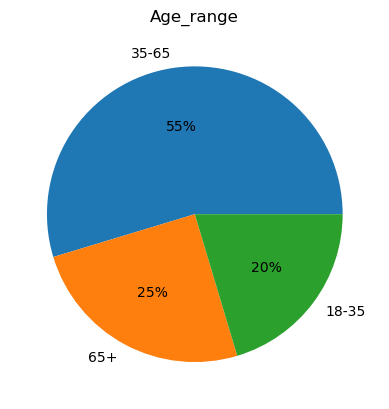

In [39]:
#Creating a pie chart of customer age range
age_profile_pie = df_insta['Age_range'].value_counts().plot.pie(title ='Age_range', label = '', autopct=('%1.f%%'))

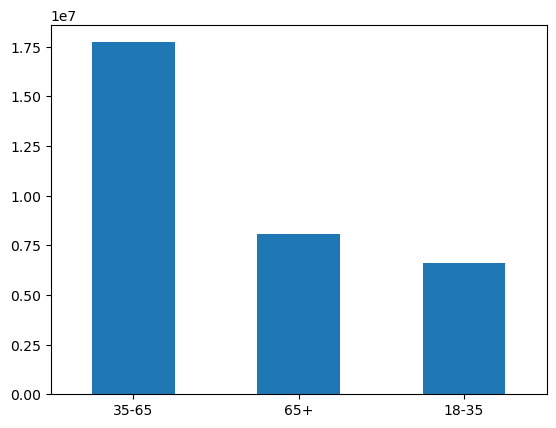

In [40]:
#Bar char for age range distribution
age_prof_bar = df_insta['Age_range'].value_counts().plot.bar(rot=0)

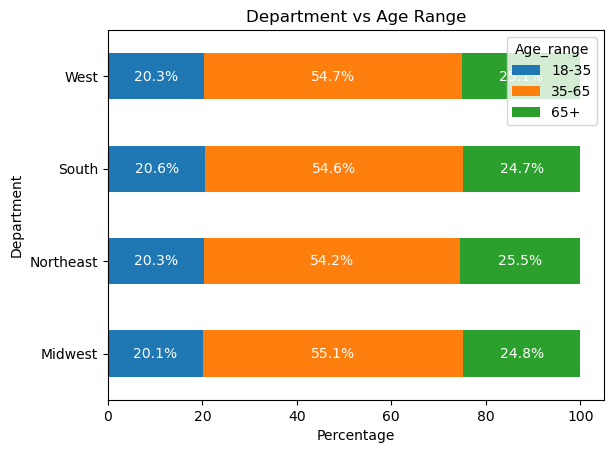

In [41]:
#Age range by department
row_sums = crosstab_department_age.sum(axis=1)

crosstab_department_age = crosstab_department_age.div(row_sums, axis=0) * 100

dep_age = crosstab_department_age.plot(kind='barh', stacked=True)

dep_age.set_xlabel('Percentage')
dep_age.set_ylabel('Department')
dep_age.set_title('Department vs Age Range')

for i, (name, row) in enumerate(zip(crosstab_department_age.index, crosstab_department_age.values)):
    x_offset = 0
    for j, value in enumerate(row):
        if value > 0:
            dep_age.text(value/2 + x_offset, i, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10)
            x_offset += value

plt.show()

In [45]:
crosstab_income_age = pd.crosstab(df_insta['Income_lvl'], df_insta['Age_range'], dropna = False)

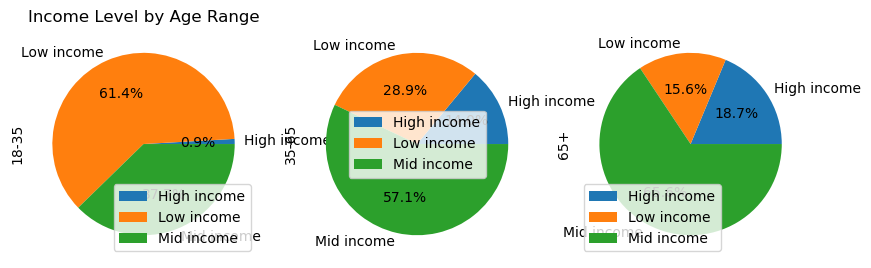

In [50]:
income_pie = crosstab_income_age.plot(kind='pie', figsize=(10, 10), subplots=True, autopct='%1.1f%%')

income_pie[0].set_title('Income Level by Age Range')

plt.show()

#### Income profiling

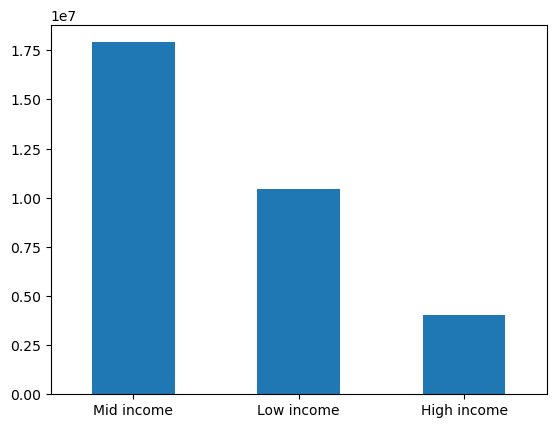

In [51]:
#Income distribution bar char
income_prof_bar = df_insta['Income_lvl'].value_counts().plot.bar(rot=0)

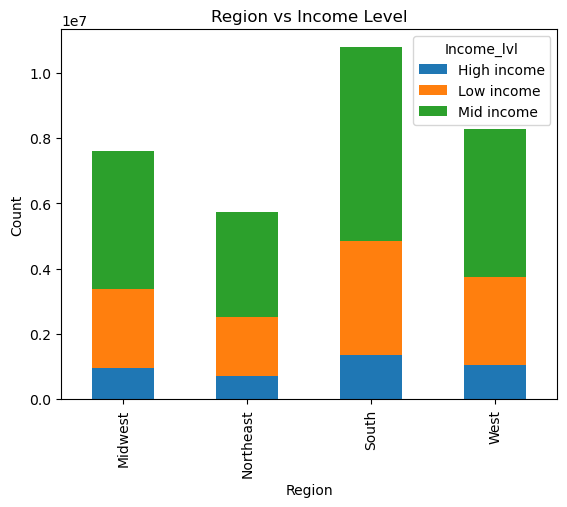

In [57]:
#Stacked bar chart region vs income lvl
region_income=crosstab_region_income.plot(kind='bar', stacked=True)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region vs Income Level')

plt.show()

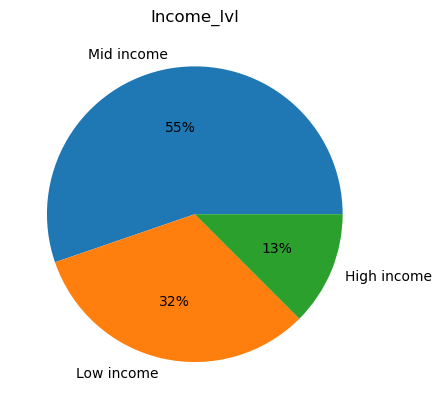

In [58]:
#Pie chart for income
income_profile_pie = df_insta['Income_lvl'].value_counts().plot.pie(title ='Income_lvl', label = '', autopct=('%1.f%%'))

AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

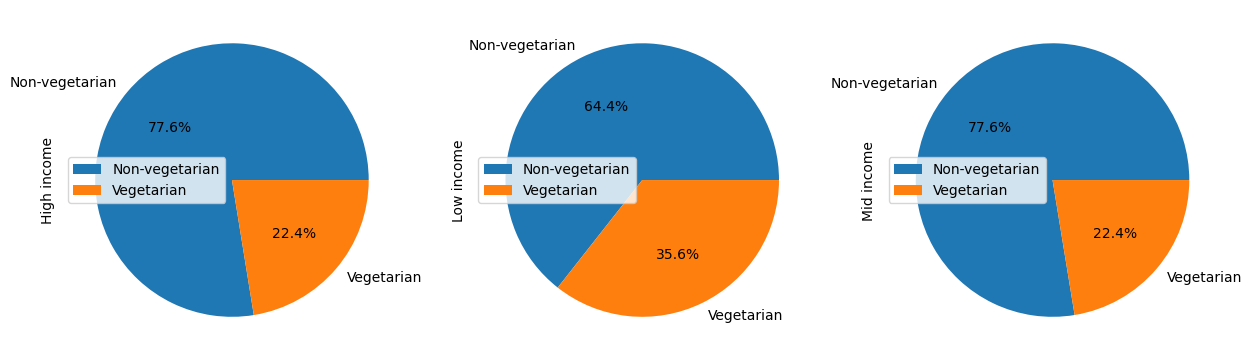

In [59]:
#Diet Income/char
diet_income = crosstab_diet_income.plot.pie(subplots=True, figsize=(15,5), autopct='%1.1f%%')

diet_income.set_title("Relationship between Diet Profile and Income Level", fontsize=16)
diet_income.set_ylabel("")

plt.show()

#### Deparment profile

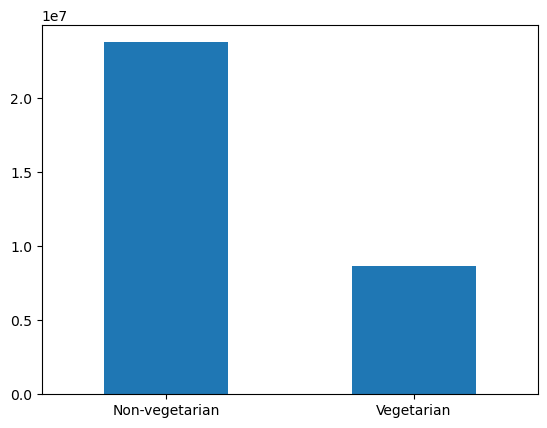

In [60]:
#Diet profile char
diet_prof_bar = df_insta['diet_profile'].value_counts().plot.bar(rot=0)

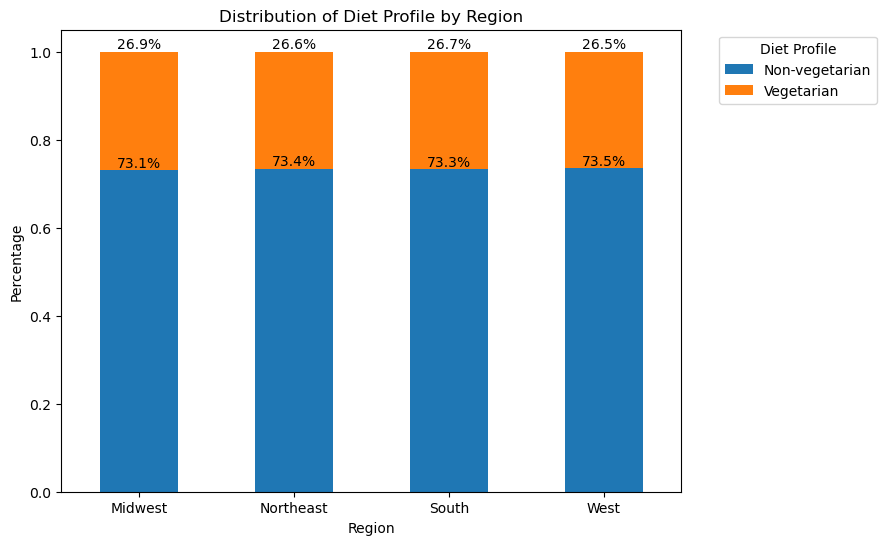

In [61]:
# stacked bar chart with percentages diet by region
diet_region = crosstab_pct.plot(kind='bar', stacked=True, figsize=(8,6))
plt.legend(title='Diet Profile', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title('Distribution of Diet Profile by Region')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

totals = crosstab_pct.sum(axis=1)
for i in diet_region.containers:
    diet_region.bar_label(i, label_type='edge', labels=['{:.1%}'.format(j) for j in i.datavalues/totals])

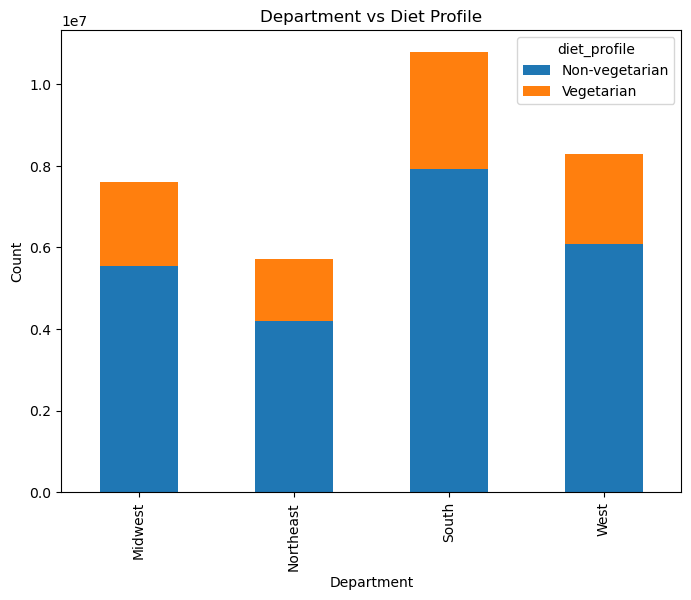

In [62]:
# stack bar for diet by deparment
stack_dep_diet = crosstab_department_diet.plot.bar(stacked=True, figsize=(8, 6))

stack_dep_diet.set_xlabel('Department')
stack_dep_diet.set_ylabel('Count')
stack_dep_diet.set_title('Department vs Diet Profile')

plt.show()

#### Dependants

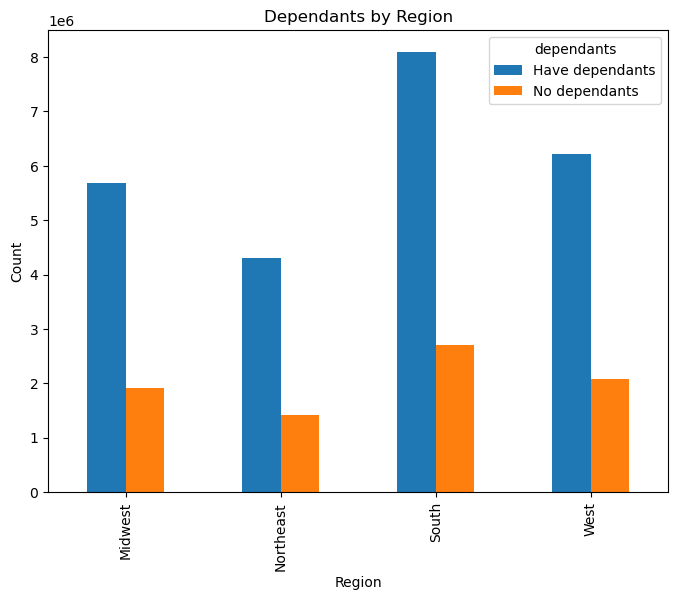

In [63]:
# Bar chart dependant by region
region_depent=crosstab_region_dep.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Region')
plt.ylabel('Count')

plt.title('Dependants by Region')

plt.show()

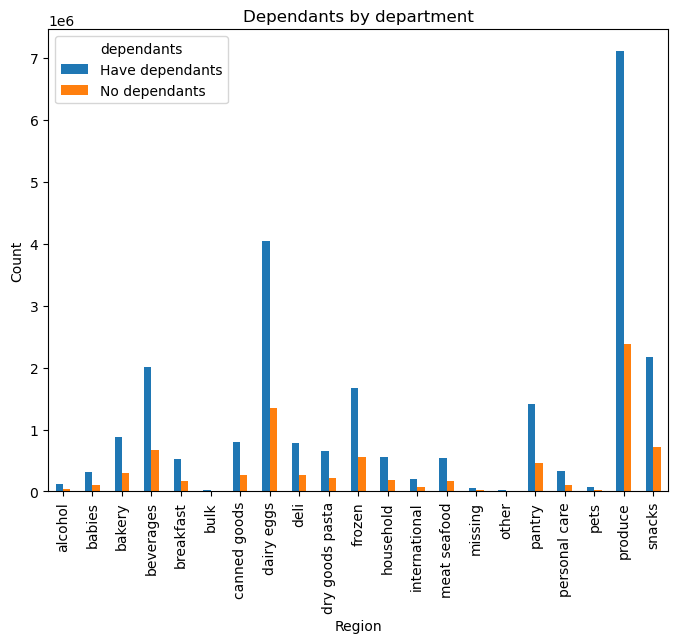

In [66]:
# stack bar dependan by department
depart_dependt=crosstab_department_dep.plot(kind='bar', figsize=(8, 6))

plt.xlabel('Region')
plt.ylabel('Count')

plt.title('Dependants by department')


plt.show()

### Exporting chars

In [67]:
# Path for visualization
path_vis=r"C:\Users\galia\Instacart Basket Analysis\04 Analysis"

In [ ]:
age_profile_pie.figure.savefig(path,"age_profile_pie.png')

In [ ]:
age_profile_pie.figure.savefig(path,'age_profile_pie.png')

In [ ]:
income_pie.figure.savefig(path,"income_pie.png')

In [ ]:
income_prof_bar.figure.savefig(path,"income_prof_bar.png')

In [ ]:
region_income.figure.savefig(path,"region_income.png')

In [ ]:
income_profile_pie.figure.savefig(path,"income_profile_pie.png')

In [ ]:
diet_income.figure.savefig(path,"diet_income.png')

In [ ]:
diet_prof_bar.figure.savefig(path,"diet_prof_bar.png')

In [ ]:
diet_region.figure.savefig(path,"diet_region.png')

In [ ]:
stack_dep_diet.figure.savefig(path,"stack_dep_diet.png')

In [ ]:
region_depent.figure.savefig(path,"region_depent.png')

In [ ]:
depart_dependt.figure.savefig(path,"depart_dependt.png')